# The Goldfish Bowl

Markov chains are useful because of their 'stationary distribution'. Let's work through an example to work out what that means.

You have three goldfish bowls; A, B and C.
 - The pipes between them have different opening sizes so where we move next has different probabilities.
    - The fish might even stay in the same bowl
 - The goldfish doesn't remember where they were before, so they may choose to stay or move at any point
 - However, there is a cat sleeping by bowl B, so if the goldfish is in there, they will leave straight away

The probabilities of moving are as follows:
 - In Bowl A, the next bowl probabilities are A:0.5, B:0.2, C:0.3
 - In Bowl B, the next bowl probabilities are A:0.6, B:0 (the cat!), C:0.4
 - In Bowl C, the next bowl probabilities are A:0.3, B:0.4, C:0.3

This is an example of a 3 state system: we can be in state (bowl) A, B or C. The lines and numbers indicate the probability we will stay in this state next or move on to one of the other states. These probabilities are written out in the transition matrix below.

$$\begin{bmatrix}
0.5 & 0.2 & 0.3 \\
0.6 & 0 & 0.4 \\
0.3 & 0.4 & 0.3
\end{bmatrix}$$

Our bowls can be considered as vectors;
$$A=[1,0,0]$$
$$B=[0,1,0]$$
$$C=[0,0,1]$$

Let's say we start in bowl A, so we start from $[1,0,0]$

The probability for the next state $x$ will be:

$$P(x_{1})=
\begin{bmatrix}
1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
0.5 & 0.2 & 0.3 \\
0.6 & 0 & 0.4 \\
0.3 & 0.4 & 0.3
\end{bmatrix}
=\begin{bmatrix}
0.5 & 0.2 & 0.3
\end{bmatrix}$$

then the probability that the goldfish is in each bowl after one step is 0.5, 0.2 and 0.3 respectively, as expected.

So we move on; what is the probability that the fish will be in each bowl after two moves?

$$P(x_{2})=
\begin{bmatrix}
0.5 & 0.2 & 0.3
\end{bmatrix}
\begin{bmatrix}
0.5 & 0.2 & 0.3 \\
0.6 & 0 & 0.4 \\
0.3 & 0.4 & 0.3
\end{bmatrix}
= ... (\textrm{if you want to}) ...$$
We can carry this on until we reach an equilibrium.

To explain what this means, let's change notation so the 'transition matrix' is called $\mathbf{Q}$ and the vector multiplying it is $\vec{a}_{n}$

so

$$\vec{a}_{n}\mathbf{Q}=\vec{a}_{n+1}$$
$$\vec{a}_{n+1}\mathbf{Q}=\vec{a}_{n+2}$$

and so on.

An important property for finite state Markov chains is they will reach an $\textit{equlibrium}$ where:

$$\vec{a}_X\mathbf{Q}=\vec{a}_X$$

(this is the *eigenvector* with an *eigenvalue* of one)

Let's see this with a simulation for our goldfish being in bowls A, B, C above.

If we are going to reach an equilibrium, then no matter what starting value we give, we should converge to the same average probability of being in state A, B or C. Try this below by changing the initial state and the number of steps.

Add comments to the below code cell explaining what each part does

Final state:  [0.45762738 0.22033857 0.32203405]


Text(0, 0.5, 'Probability')

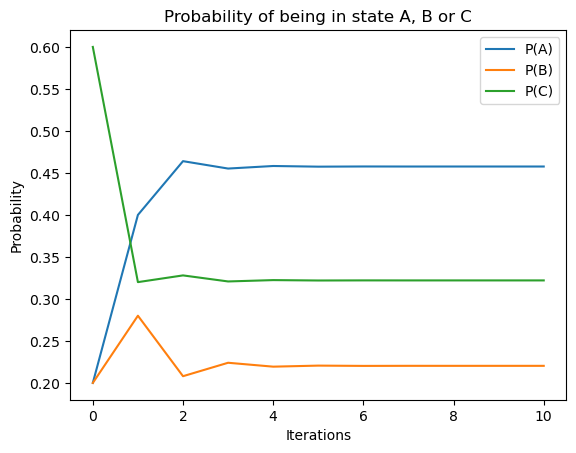

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import corner

### Try me for different starting points A, B or C and
### different numbers of steps
initial_state=np.array([0.2,0.2,0.6])
number_of_steps=10

transition_matrix=np.array([[0.5,0.2,0.3],[0.6,0,0.4],[0.3,0.4,0.3]])

def next_step(current,transition):
    next_step = np.dot(current,transition)
    return next_step

objects = ('A', 'B', 'C')
y_pos = np.arange(len(objects))
vals = [initial_state]
for i in range(number_of_steps):
    next_pos = next_step(vals[-1], transition_matrix)
    vals.append(next_pos)

print("Final state: ", vals[-1])
vals = np.array(vals)
plt.figure()
plt.plot(vals[:,0], label='P(A)')
plt.plot(vals[:,1], label='P(B)')
plt.plot(vals[:,2], label='P(C)')
plt.legend()
plt.title('Probability of being in state A, B or C')
plt.xlabel('Iterations')
plt.ylabel('Probability')



What do you notice about the above plot. Hint: what do the final values add up to?